#### Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [2]:
# Setting style
from matplotlib import rcParams

sns.set_style('darkgrid')
rcParams['figure.figsize'] = 10.7,7.27

#### Importing Dataset

In [3]:
data_import = pd.read_csv("Data - What Occupations Have the Best Sex Life Edited - Main.csv")

#### Getting info about the dataset

In [4]:
data_import.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 563 entries, 0 to 562
Data columns (total 36 columns):
 #   Column                                                                                                                        Non-Null Count  Dtype  
---  ------                                                                                                                        --------------  -----  
 0   Respondent ID                                                                                                                 563 non-null    int64  
 1   Collector ID                                                                                                                  563 non-null    int64  
 2   Start Date                                                                                                                    563 non-null    object 
 3   End Date                                                                                                           

## Cleaning Data and getting ready for analysis

In [5]:
data_copy = data_import.copy()

In [6]:
# Dropping unnecessary columns
columns_to_drop = ['Collector ID', 'Start Date', 'End Date', 'IP Address',
       'Email Address', 'First Name', 'Last Name', 'Custom Data 1',
       'collector_type_source', 'custom_value8', 'custom_value9',
       'custom_value7','Unnamed: 16', 'Unnamed: 22', 'Device Type', 'Region']

In [7]:
# Creating copy of the dataset
data_copy.drop(columns = columns_to_drop, inplace = True)

In [8]:
#adding columns 'First Occupation' and 'Second Occupation'
data_copy[['First Occupation','Second Occupation']] = data_copy["What's your occupation?"].str.split(',', expand=True)

In [9]:
# Dropping "What's your occupation?" and "What's your Gender" column
drop_cols = ["What's your occupation?","What is your gender?"]
data_copy.drop(columns = drop_cols, inplace = True)

In [11]:
# Renaming Columns to make them more suitable for analysis
data_copy.rename(columns = {
        'Respondent ID' : 'ID',
        'Which of the following best describes the industry you work in?': 'Your Industry',
        'Which of the following best describes your current job level?' : 'Job Level',
        'What state do you reside in?' : 'State',
        'How happy or unhappy are you with your current role at your job?' : 'Job Role Happiness',
        'What is the highest degree or level of school you have completed? If currently enrolled, highest degree received.' : 'Highest Degree Completed',
        'What is your marital status?' : 'Marital Status',
        'How satisfied or dissatisfied are you with your sex life?' : 'Sexual Satisfaction',
        'How often do you have sex?' : 'Sex Frequency',
        'How often do you have an orgasm during sexual intercourse?': 'Orgasm Frequency',
        'How often do you fake an orgasm?' : 'Orgasm Faking',
        'How would you rate your "performance" in bed?' : 'Sexual Performance',
        'How many times per week do you exercise or work out?' : 'Excercise Frequency',
        'How desirable do you find yourself?' : 'Desirable Level',
        'Would you agree with the following statement: My sex life was better before I graduated from college than after I graduated.' : 'Better Sex Before Graduating',
        'Household Income' : 'Income',
        'First Occupation' : 'Occupation',
        'Second Occupation' : '2nd Occupation'}, inplace = True)

In [12]:
data_copy.head(3)

,ID,Your Industry,Job Level,State,Job Role Happiness,Highest Degree Completed,Marital Status,Sexual Satisfaction,Sex Frequency,Orgasm Frequency,Orgasm Faking,Sexual Performance,Excercise Frequency,Desirable Level,Better Sex Before Graduating,Income,Gender,Age,Occupation,2nd Occupation
0,13364008039,Entertainment & Leisure,Middle Management,Illinois,Very happy,High School,"Single, never married",Very satisfied,Every day,Always,Never,Far above average,Once per week,Very desirable,Somewhat agree,"$10,000-$24,999",Male,30-44,Server,None
1,13364006787,Business Support & Logistics,Intermediate,Pennsylvania,Somewhat happy,Bachelor's Degree,Married or domestic partnership,Neither satisfied nor dissatisfied,Less than once a month,Usually,Never,Average,Several times per week,Somewhat desirable,Strongly disagree,"$125,000-$149,999",Male,30-44,Administrative assistant,Data Analyst
2,13364005450,I am currently not employed,Other (please specify),Idaho,Neither happy nor unhappy,Some High School,"Single, never married",Neither satisfied nor dissatisfied,Less than once a month,Never,Never,Below average,Once per week,Somewhat desirable,Neither agree nor disagree,"$10,000-$24,999",Male,30-44,Carpenter,None


In [13]:
work_data = data_copy.copy()

In [14]:
work_data.columns

Index(['ID', 'Your Industry', 'Job Level', 'State', 'Job Role Happiness',
       'Highest Degree Completed', 'Marital Status', 'Sexual Satisfaction',
       'Sex Frequency', 'Orgasm Frequency', 'Orgasm Faking',
       'Sexual Performance', 'Excercise Frequency', 'Desirable Level',
       'Better Sex Before Graduating', 'Income', 'Gender', 'Age', 'Occupation',
       '2nd Occupation'],
      dtype='object')

In [15]:
# Changing positions of the columns
column_names = ['ID', 'Gender', 'Age', 'Your Industry','Occupation',
       '2nd Occupation', 'Job Level', 'Income', 'State', 'Job Role Happiness',
       'Highest Degree Completed', 'Marital Status', 'Sexual Satisfaction',
       'Sex Frequency', 'Orgasm Frequency', 'Orgasm Faking',
       'Sexual Performance', 'Excercise Frequency', 'Desirable Level',
       'Better Sex Before Graduating' ]
work_data = work_data.reindex(columns = column_names)
work_data.head(3)

,ID,Gender,Age,Your Industry,Occupation,2nd Occupation,Job Level,Income,State,Job Role Happiness,Highest Degree Completed,Marital Status,Sexual Satisfaction,Sex Frequency,Orgasm Frequency,Orgasm Faking,Sexual Performance,Excercise Frequency,Desirable Level,Better Sex Before Graduating
0,13364008039,Male,30-44,Entertainment & Leisure,Server,None,Middle Management,"$10,000-$24,999",Illinois,Very happy,High School,"Single, never married",Very satisfied,Every day,Always,Never,Far above average,Once per week,Very desirable,Somewhat agree
1,13364006787,Male,30-44,Business Support & Logistics,Administrative assistant,Data Analyst,Intermediate,"$125,000-$149,999",Pennsylvania,Somewhat happy,Bachelor's Degree,Married or domestic partnership,Neither satisfied nor dissatisfied,Less than once a month,Usually,Never,Average,Several times per week,Somewhat desirable,Strongly disagree
2,13364005450,Male,30-44,I am currently not employed,Carpenter,None,Other (please specify),"$10,000-$24,999",Idaho,Neither happy nor unhappy,Some High School,"Single, never married",Neither satisfied nor dissatisfied,Less than once a month,Never,Never,Below average,Once per week,Somewhat desirable,Neither agree nor disagree


## Data Analysis and Visualization

### Number of Participants per Gender

Previously, we could see that we have 563 entries which means that we have 563 unique participants. Now let's try to find out the gender of our participants:

In [16]:
gender_number = work_data['Gender'].value_counts().reset_index()

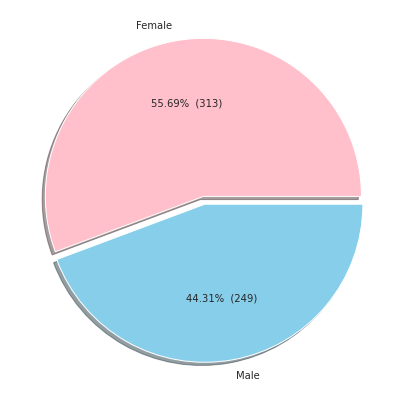

In [17]:
colors = sns.color_palette(['Pink', 'skyblue'])
labels = ['Female', 'Male']
explode = (0.05, 0.0)
values = [gender_number.Gender.sum()]
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

plt.pie(gender_number.Gender,
        explode = explode, 
        labels = labels, 
        autopct= make_autopct(values),
        colors = colors,
        shadow = True);

We can clearly see that of our 563 participants, 55.69% or 313 participants are female participants and 44.31% or 249 participants are male participants. That means that our dataset is well balanced between genders. <br><br>

### Number of Participants per Occupation

After we found out the number of female and male participants, we can now proceed to calculating the number of participants per occupation. The goal is to see if any occupation is dominating over some other occupations.

In [18]:
occupation_one = work_data['Occupation'].value_counts().reset_index()
occupation_two = work_data['2nd Occupation'].value_counts().reset_index()

In [19]:
frames = [occupation_one, occupation_two]
occupation_df = pd.concat(frames, ignore_index=True)
occupation_df = occupation_df.head(20)

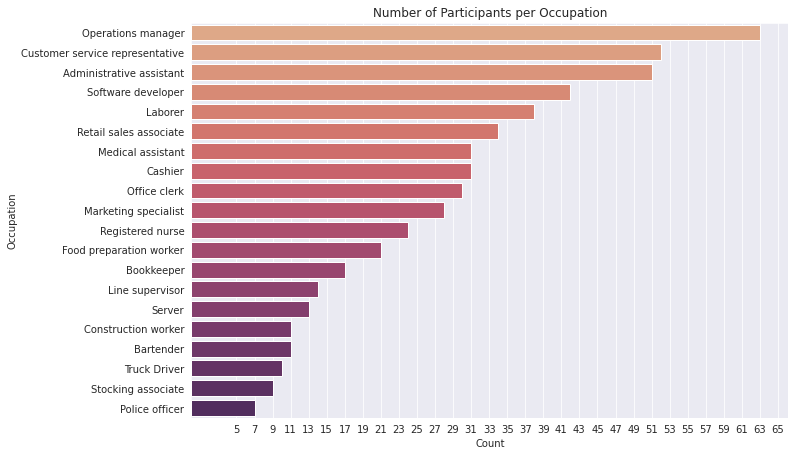

In [20]:
sns.barplot(x = occupation_df['Occupation'], y = occupation_df['index'], palette = 'flare')
plt.title('Number of Participants per Occupation')
plt.xlabel('Count')
plt.ylabel('Occupation')
plt.xticks(np.arange(5,66,2));

This BarPlot is showing us that the dominant occupation is 'Operations Manager' with 63 entries, by knowing that, we can point our focus to the top 6 occupations which are : <br>
Operations Manager (63),<br>
Customer Service Representative (52),<br>
Administrative Assistant (51),<br>
Software Developer (42),<br>
Laborer (38),<br>
Retail Sales Associate (34).<br>
We won't focus too much on other occupations because they have over 100% fewer entries than the top occupation 'Operations Manager' and because of that, they can not be seen as relevant.<br><br>

### General Satisfaction with Sexual Life per Occupation


Now let's find out what is the general satisfaction with the sexual life of our participants. <br>
To have a better understanding of the level of satisfaction, I transformed sexual satisfaction answers into satisfaction levels.<br>
**The changes are**:<br>
>"Very Dissatisfied" -> 1,<br>
>"Dissatisfied" -> 2,<br>
>"Neither satisfied nor dissatisfied" -> 3,<br>
>"Satisfied" -> 4,<br>
>"Very satisfied" -> 5.<br>

In [21]:
stfc_df = work_data[['Sexual Satisfaction', 'Occupation', 'Excercise Frequency']]

In [22]:
my_map = {'Very dissatisfied': 1, 'Dissatisfied': 2, 'Neither satisfied nor dissatisfied': 3, 'Satisfied': 4, 'Very satisfied': 5}
stfc_df = stfc_df.applymap(lambda s: my_map.get(s) if s in my_map else s)

In [23]:
sexual_satisfaction_1 = stfc_df[['Sexual Satisfaction', 'Occupation']].value_counts().reset_index().head(50)
sex_satisfaction_1 = sexual_satisfaction_1.groupby(['Sexual Satisfaction','Occupation' ]).sum()
sex_satisfaction_1

0
Sexual Satisfaction Occupation                         
1                   Customer service representative   7
                    Laborer                           6
                    Operations manager                5
                    Software developer                7
2                   Administrative assistant          8
                    Customer service representative   7
                    Marketing specialist              9
                    Operations manager                5
                    Software developer                7
3                   Administrative assistant         19
                    Bookkeeper                        6
                    Cashier                          10
                    Customer service representative  18
                    Food preparation worker           5
                    Laborer                          12
                    Line supervisor                   6
                    Medical assistant                11
                    Office clerk                     11
                    Operations manager               15
                    Registered nurse                  9
                    Retail sales associate            6
                    Server                            5
                    Software developer                7
4                   Administrative assistant         16
                    Cashier                           7
                    Construction worker               4
                    Customer service representative  10
                    Food preparation worker           7
                    Janitor                           4
                    Laborer                          10
                    Lawyer                            4
                    Marketing specialist              8
                    Medical assistant                11
                    Office clerk                      8
                    Operations manager               21
                    Registered nurse                  5
                    Retail sales associate           11
                    Server                            4
                    Software developer               14
5                   Administrative assistant          7
                    Cashier                           9
                    Customer service representative  10
                    Food preparation worker           6
                    Laborer                           6
                    Medical assistant                 7
                    Office clerk                      5
                    Operations manager               17
                    Registered nurse                  6
                    Retail sales associate           13
                    Software developer                7

The Table is grouped by *'Sexual Satisfaction' (Left Column)*, followed by *'Occupation' (Middle Column)* and on the right, we have the *SUM* which represents the number of participants in every 'Sexual Satisfaction' group. <br>
We can see that we have some 'Occupations' that are repeating in 'Sexual Satisfaction' levels 4 and 5 and we can also see the number of participants, so by looking at the data we can understand that **top 10** 'Occupations' that are most satisfied with their sexual life are:<br>
>Operations manager (38), <br>
>Retail sales associate (24), <br>
>Administrative Assistant (23),<br> 
>Software developer (21),<br> 
>Customer service representative (20),<br> 
>Medical assistant (18),<br> 
>Laborer (16),<br> 
>Cashier (16),<br> 
>Food preparation worker (13),<br> 
>Office clerk (13)<br>

###  More filtered data with 'Excercise Frequency' column

Let's now filter data furthermore and try to see if there is any correlation between *Excercise Frequency* and *Sexual Satisfaction*.

In [24]:
sexual_satisfaction_2 = stfc_df[['Sexual Satisfaction', 'Occupation', 'Excercise Frequency']].value_counts().reset_index().head(55)
sex_satisfaction_2 = sexual_satisfaction_2.groupby(['Sexual Satisfaction', 'Occupation', 'Excercise Frequency']).sum().sort_values('Sexual Satisfaction')
sex_satisfaction_2

0
Sexual Satisfaction Occupation                      Excercise Frequency             
2                   Marketing specialist            Less than once per week        3
                                                    Several times per week         3
                    Software developer              Several times per week         3
3                   Retail sales associate          Less than once per week        3
                    Registered nurse                Once per week                  3
                                                    I never work out or exercise   4
                    Operations manager              Several times per week         4
                                                    Once per week                  3
                                                    Less than once per week        4
                                                    I never work out or exercise   3
                    Office clerk                    Several times per week         5
                    Medical assistant               Several times per week         5
                                                    Once per week                  3
                    Line supervisor                 Several times per week         4
                    Office clerk                    Less than once per week        3
                    Laborer                         I never work out or exercise   5
                    Administrative assistant        I never work out or exercise   7
                    Laborer                         Less than once per week        3
                    Administrative assistant        Several times per week         6
                    Bookkeeper                      Several times per week         3
                    Cashier                         Every day of the week          4
                    Administrative assistant        Less than once per week        4
                    Customer service representative I never work out or exercise   3
                                                    Once per week                  4
                                                    Several times per week         7
                    Food preparation worker         Several times per week         3
                    Cashier                         Several times per week         3
4                   Office clerk                    Several times per week         4
                    Stocking associate              Several times per week         3
                    Software developer              Several times per week         5
                                                    Once per week                  3
                                                    Less than once per week        3
                    Server                          Several times per week         4
                    Retail sales associate          Several times per week         4
                                                    Every day of the week          3
                    Operations manager              Several times per week        11
                    Medical assistant               Several times per week         4
                    Administrative assistant        Every day of the week          3
                    Marketing specialist            Every day of the week          3
                    Laborer                         Several times per week         5
                    Customer service representative Several times per week         4
                                                    I never work out or exercise   4
                    Cashier                         Several times per week         4
                    Administrative assistant        Several times per week         5
                                                    Once per week                  4
                                                    Less than once per week        3
   

As described in the previous section, data is grouped on *'Sexual Satisfaction'* (Left Column), *'Occupation'* (Middle Column), we added one more column *'Excercise Frequency'* on which we are filtering data, and on the right is the *SUM* of participants with their exercise Frequency answers. Looking at the data we can recognize patterns. We can clearly see that *'Occupations'* with *'Sexual Satisfaction'* levels 4 and 5 tend to exercise more, we can see that in the category 4 and 5 dominant answer is *'Several times per week'* followed by *'Every day of the week'*.<br> As further we go, in *'Sexual Satisfaction'* level 3 and below we can see that answers are changing to *'Less than once per week'*, *'Once per week'*, and *'I never work out or exercise'*.
So after reviewing the data we can tell that **there is a correlation between sexual satisfaction and working out**.

### Plotting average level of Sexual Satisfaction

Lastly let's plot the average level of sexual satisfaction per *'Occupation'*.

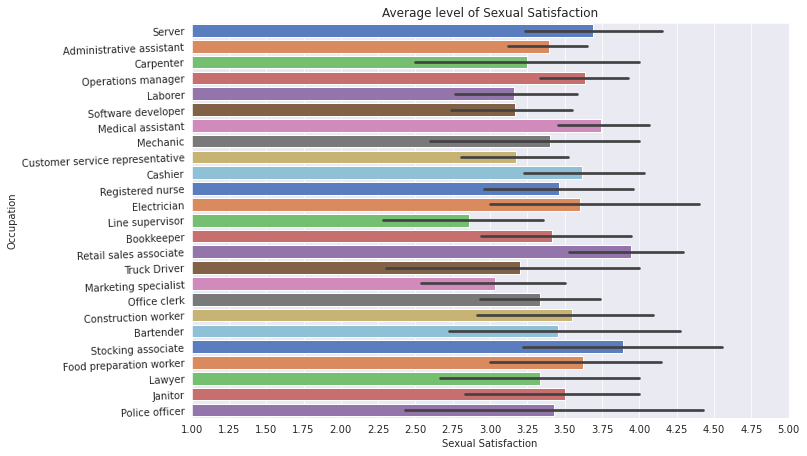

In [30]:
sns.barplot(y =stfc_df['Occupation'] ,x = stfc_df['Sexual Satisfaction'], palette = 'muted')
plt.xticks(np.arange(0,5.5,0.25))
plt.yticks(rotation = 2)
plt.xlim(1,5)
plt.title('Average level of Sexual Satisfaction');

In the plot above we can see levels of average *'Sexual Satisfaction'* of our participants based on their *'Occupation'*. <br> The black horizontal lines represent *'Standard Deviation'* of our data, and here we can see that in some 'Occupations' deviation is smaller than in the others, keeping that deviation in mind we can conclude that we can use this plot only **as a reference**, but we can get some sense of a range of our data.

In [31]:
work_data.to_csv('Final.csv')

______________________________________________________________________________________________________________________________________________________________________________

### Summary

Let's summarize in short lines what we learned from this analysis:<br>
 - The total number of participants is **563** of which **55.69% or 313** participants are **females** and **44.31% or 249** participants are **male** participants.
 - The **top 6** occupations are:
     - Operations Manager (63), <br>
     - Customer Service Representative (52),<br>
     - Administrative Assistant (51),<br>
     - Software Developer (42),<br>
     - Laborer (38),<br>
     - Retail Sales Associate (34).<br>
 - The Occupations with the **highest Sexual Satisfaction** are: 
     - Operations manager (38),<br>
     - Retail sales associate (24),<br>
     - Administrative Assistant (23),<br>
     - Software developer (21),<br>
     - Customer service representative (20),<br>
     - Medical assistant (18),<br>
     - Laborer (16),<br>
     - Cashier (16),<br>
     - Food preparation worker (13),<br>
     - Office clerk (13)<br>
 - The Correlation between Sexual Satisfaction and Exercising clearly exists. We discovered that **participants with higher Sexual Satisfaction levels tend to Excercise more than others**.